# Spectral Methods for Hyperbolic Equations

## Review from Last Week: Wave Equation

Recall from last week the 1D wave equation:
$$ \frac{\partial^2\phi}{\partial t^2}=v^2\frac{\partial^2\phi}{\partial x^2} $$
  
We considered a piano string of length $L$, initially at rest. At time $t=0$ the string is struck by the piano hammer a distance $d$ from the end of from the string. The string vibrates as a result of being struck, except at the ends, $x=0$, and $x=L$, where it is held fixed.

We considered the case $v=100\mathrm{ms^{-1}}$, with the initial condition that $\phi(x)=0$ everywhere but the velocity $\psi(x)$ is nonzero, with profile
\begin{equation}
  \psi(x) = C\frac{x(L-x)}{L^2}\exp\left[-\frac{(x-d)^2}{2\sigma^2}\right],
\end{equation}
where $L=1$m, $d=10$cm, $C=1\mathrm{ms^{-1}}$, and $\sigma=0.3$m. 

## New This Week

Now, we can expand the  initial conditions in terms of a Fourier sine series:
$$ \phi_0(x)=\sum_{k=1}^{\infty}\tilde\phi_{0,k}\sin\left(\frac{k\pi x}L\right)$$
$$ \psi_0(x)=\sum_{k=1}^{\infty}\tilde{\psi}_{0,k}\sin\left(\frac{k\pi x}L\right)$$
Note  that all the terms in this series vanish at $x=0$ and $x=L$, automatically satisfying the boundary conditions for $\phi$, and similarly for $\psi$.

We can show, the general solution in terms of the Fourier series is:
$$ \phi(x,t)=\sum_{k=1}^{\infty}\sin\left(\frac{k\pi x}L\right)\left[\tilde\phi_{0,k}\cos(\omega_kt)+\frac{\tilde{\psi}_{0,k}}{\omega_k}\sin(\omega_kt)\right] $$
 * By substitution:
$$  v^2\frac{\partial^2\phi(x,t)}{\partial x^2}=-\sum_{k=1}^{\infty}(vk\pi/L)^2\sin(k\pi x/L)\left[\tilde\phi_{0,k}\cos(\omega_kt)+\frac{\tilde{\psi}_{0,k}}{\omega_k}\sin(\omega_kt)\right]
$$ 
and
$$ \frac{\partial ^2\phi(x,t)}{\partial t^2}=-\sum_{k=1}^{\infty}(\omega_k)^2\sin(k\pi x/L)\left[\tilde\phi_{0,k}\cos(\omega_kt)+\frac{\tilde{\psi}_{0,k}}{\omega_k}\sin(\omega_kt)\right]$$
 * This requires, to satisfy the wave equation, that for each $k$:
    $$\omega_k^2 = (vk\pi/L)^2.$$ 
 * At $t=0$:
$$ \phi_0(x)=\sum_{k=1}^{\infty}\sin(k\pi x/L)\tilde\phi_{0,k},\ \psi_0(x)=\sum_{k=1}^{\infty}\sin(k\pi x/L)\tilde{\psi}_{0,k}
$$
    as required, thus the solution satisfies the initial conditions. Furthermore the solution automatically satisfies the boundary conditions since $sin(k\pi x/L)$ vanishes at the $x=0$ and $x=L$ for all integer $k$.

## Exercise 1

Use a series solution like this, but truncated at a finite $N$, to repeat Exercise 6 from last week. In case you forgot: 
**Solve from times 0 to 0.1s, and make a plot of $\phi$ vs $x$ over the entire length of string at each of the following times:**
* 0.006 s
* 0.004 s
* 0.002 s
* 0.012 s
* 0.100 s

You can afford to use a large $N$, since you should only have to do one Fourier transform. You may use packaged Fourier functions such as numpy.fft.rfft, numpy.fft.irfft . You can even use functions from the textbook's dcst.py file.

In [21]:
import matplotlib.pyplot as plt
_ = 1.0 #m
d = 0.1 #m
v = 100.0 #m/s
C = 1.0 #m/s
sigma = 0.3 #m/s
SnapshotTimes = np.array ([2e-3, 4e-3, 6e-3, 12e-3, 100e-3])

def setup_grid(N = 2**8):
    a=L/N
    x = np.arange(0,L,a)
    psi = C*x*(L-x)*np.exp(-(x-d)**2/(2*sigma**2))/L**2
    phi = np. zeros_like(x)
    return x, phi, psi

In [22]:
def plot_results(positions, values, title):
    LegendLabel = []
    for c,t in enumerate(values) :
        time, phi, psi = t
        plt.plot(positions, phi, zorder=-c)
        plt.ylim ((-5e-4,5e-4))
        LegendLabel.append ('Phi(t=%3.2e) '%time)
        plt.legend (LegendLabel)
        plt.title(title)

In [23]:
def makeFourierArrays (v=100.0,L=1.0,N=2**8):
    karr = np.arange(N)
    omarr = v*karr*np.pi/L
    return karr, omarr

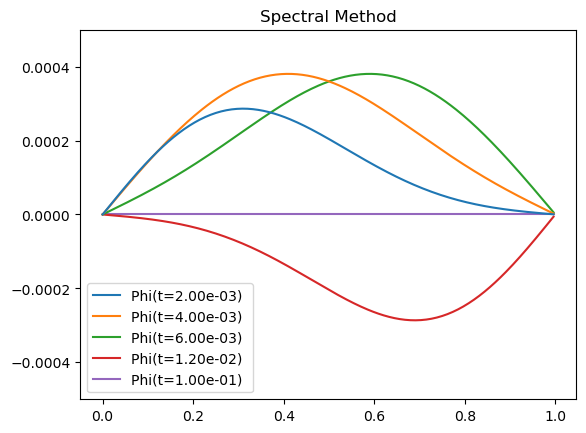

In [26]:
from dcst import dst, idst

[x, phi, psi] = setup_grid()
[karr, omarr] = makeFourierArrays()

phiDST = np.empty((len(SnapshotTimes), len(x)), float)
FTpsi = dst(psi)
FTphi = np.zeros_like(FTpsi)
FTphi[1:] = FTpsi[1:] / omarr[1:]

for ii, tt in enumerate(SnapshotTimes):
    phiDST[ii, :] = idst(FTphi * np.sin(omarr * tt))

results = []
for ii, tt in enumerate(SnapshotTimes):
    results.append([tt, phiDST[ii, :], None])

plot_results(x, results, 'Spectral Method')

# Boundary Value Problem Example: Shooting Method for Projectile Motion

Suppose we want to choose an initial velocity $v_0$ for a projectile, thrown straight upward, to land after a certain elapsed time $t_L = 10$ s, where the projectile obeys Newton's 2nd Law:
$$\frac {d^2 y}{dt^2} = \frac{F(y)}m \quad \Rightarrow \quad \frac{dy}{dt} = v\quad \text{and}\quad \frac{dv}{dt} = \frac{F(y)}{m}.$$
Take the gravitational constant to be $g = 9.81 m/s^2$

## Exercise 2

Write code to integrate the equations, using RK4, from time $t=0$ to $t=t_L$ to find $y$ of the projectile at $t=t_L$. It should be a function of $v_0$. Assume the projectile starts at $y=0$ at $t=0$.

Hint: keep track of both $y$ and $v$. At each timestep of the RK4 algorithm, you need to invoke a function that encodes the change in $y$ and the change in $v$. The number of timesteps should be a parameter that you can set.

In [32]:
t0 = 0.  # seconds
tL = 10.  # seconds
y0 = 0
g = 9.81 # m/s^2
N = 1000
h = (tL - t0)/N

In [34]:
def f(r): # used in RK4 calculation
    return np.array([r[1], -g], float)
                     
def height(v):
    r = np. array([0.0, v], float)
    for t in np.arange(t0, tL, h):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6.
    return r[0]

## Exercise 3

Write code that performs a binary search to find the initial value of velocity, $v_0$, that gives us $y=0$ (with target accuracy 1e-8) at $t = t_L$. Invoke the code from the previous exercise (try 1000 RK4 steps) at each step of the search.

In [38]:
target = 1e-8 # Target accuracy
v1 = 0.01
v2 = 1000.0
h1 = height(v1)
h2 = height(v2)

while np.abs(h2-h1) > target:
    vp = (v1+v2)/2.
    hp = height(vp)
    if h1*hp > 0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp

v = (v1+v2)/2
print("The required initial velocity is", v, "m/s")

The required initial velocity is 49.05000000042803 m/s


# Verlet Method Example: Orbit Calculation

The position $r(x,y)$ of Earth in its orbital plane can be approximately described by: $$\frac{d^2 \mathbf r}{d t^2} = \frac{-G M \mathbf r}{r^3} $$
where $M = 1.9891 \times 10^{30}$ (mass of Sun in kg). You can import $G$ from scipy.constants

In [1]:
from scipy.constants import G

Note, when Earth is at its closest point to the Sun (perihilion):
* its direction of motion is perpendicular to the line between itself and the Sun
* $r = 1.471 \times 10^{11}$ m
* linear velocity $v = 3.0287 \times 10^4$ m/s

## Exercise 4

Write a program to calculate Earth's position using Verlet method, with timestep $h$ = 1 hour, over 5 years. 

You probably want to keep track of $x$ and $y$ separately (similarly $v_x$ and $v_y$), and calculate $r = \sqrt{x^2+y^2}$. 

Define the x, y axes as: Earth starts at perihelion, along x>0, with positive velocity along y axis

In [42]:
import numpy as np
from scipy.constants import G

M = 1.989e30
PH = 1.471e11
VP = 3.0287e4
h = 3600.0
Nrevs = 5
year = 365.25 * 24 * 3600.0
T = Nrevs * year
Nsteps = int(T / h)

def f(r_):
    x, y, vx, vy = r_[0], r_[1], r_[2], r_[3]
    r = (x**2 + y**2)**0.5
    prefac = -G * M / r**3
    return np.array([vx, vy, x * prefac, y * prefac], float)

pos = np.empty((2, Nsteps), float)
vel = np.empty((2, Nsteps), float)

v0 = np.array([0.0, VP])
pos[:, 0] = np.array([PH, 0.0])
r = (pos[0, 0]**2 + pos[1, 0]**2)**0.5
vel[:, 0] = v0 - h * G * M * pos[:, 0] / r**3

for tt in range(1, Nsteps):
    pos[:, tt] = pos[:, tt - 1] + h * vel[:, tt - 1]
    r = (pos[0, tt]**2 + pos[1, tt]**2)**0.5
    vel[:, tt] = vel[:, tt - 1] - h * G * M * pos[:, tt] / r**3

## Exercise 5

Plot $y$ vs $x$ over the 5 years. This should draw over an orbit 5 times; the orbit should be slightly, but visibly, non-circular. Make the plot in units of AU = Astronomical Unit = average Earth-Sun distance.

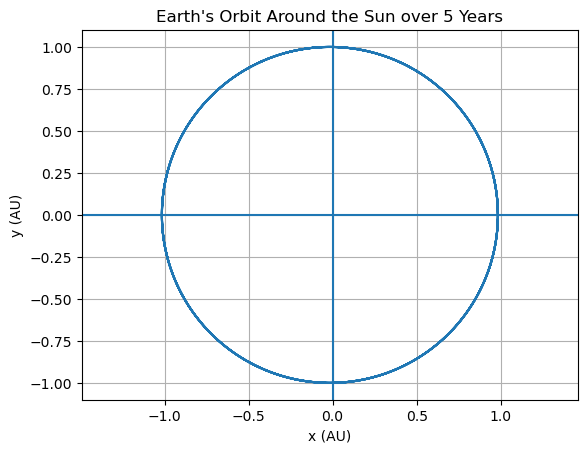

In [49]:
import matplotlib.pyplot as plt
from scipy.constants import au

# Convert position to AU
x_au = pos[0, :] / au
y_au = pos[1, :] / au

plt.plot(x_au, y_au)
plt.xlabel("x (AU)")
plt.axhline(0.0)
plt.axvline(0.0)
plt.ylabel("y (AU)")
plt.title("Earth's Orbit Around the Sun over 5 Years")
plt.grid()
plt.axis('equal')
plt.show()